### Supermarket Sales

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Attribute information

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

Link of Dataset : https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales/download?datasetVersionNumber=3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

### A. Data Cleaning
First five records of Dataset

In [2]:
df=pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


### Descriptive Statistics of Dataset

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


It will Show all the Descriptive Statistics of GIven Dataset

### Information of Dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

### Date is given in string format converting into datetime format

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


There are 17 columns are in our dataset in which 1000 records available without null values. It is Good for our Visualization.

### Name of the columns present in our Dataset

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

Columns given in Dataset are ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

### 1. How Many Male & Female bought products from the supermarket

In [7]:
df['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

There are 501 FeMale and 499 Male are purchase the product

### 2. How many Male and Female are shop member

Male     Member : 240   Normal :  259
FeMale   Member : 261   Normal :  240


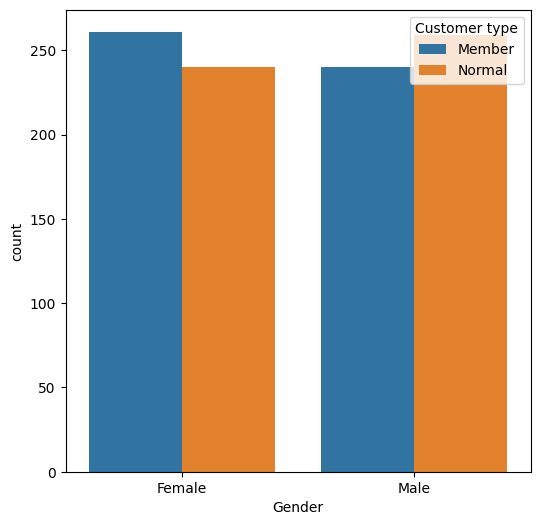

In [8]:
print('Male    ','Member :',len(df.loc[(df['Gender']=='Male') & (df['Customer type']=='Member')]),
      '  Normal : ',len(df.loc[(df['Gender']=='Male') & (df['Customer type']=='Normal')]))

print('FeMale  ','Member :',len(df.loc[(df['Gender']=='Female') & (df['Customer type']=='Member')]),
      '  Normal : ',len(df.loc[(df['Gender']=='Female') & (df['Customer type']=='Normal')]))

plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df['Gender'],hue='Customer type')
plt.show()

Most Female are customer members and most Male customer type is 'Normal'

### 3. Display the Detail of customer who paid highest payment among them

In [9]:
df.loc[df['Total']==df['Total'].max()]

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,860-79-0874,C,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2019-02-15,14:53,Credit card,993.0,4.761905,49.65,6.6


Highest Payment Paid amount is '$ 1042.65' on 'Fashion accessories' having Invoice ID '860-79-0874'

### 4. Which Payment Mode Used most by customer

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


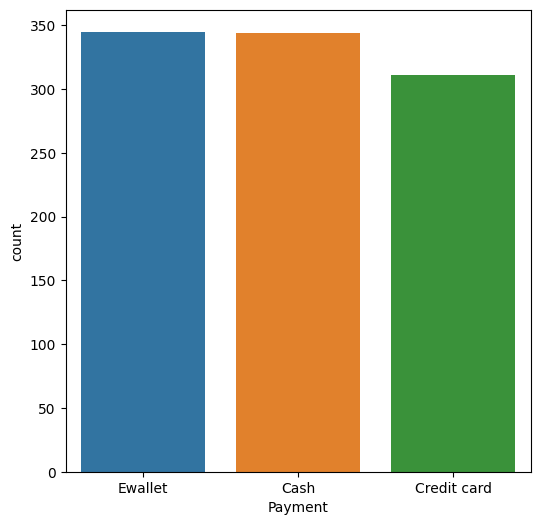

In [10]:
print(df['Payment'].value_counts())

plt.figure(figsize=(6,6))
sns.countplot(data=df,x=df['Payment'])
plt.show()

Customers mostly use 'Ewallet' and 'Cash Payment' for mode for payment 

### 5. Find out the total sales and gross income of the supermarket

In [11]:
df['Total'].sum()

322966.749

In [12]:
df['gross income'].sum()

15379.368999999999

The total sale of supermarket company of all the three months is $ 322966.749

The total gross income of supermarket company of all the three months is $ 15379.368999999999

### 6. Display city Name of the Products and  total gross income by the products

Branch  City       Product line          
A       Yangon     Electronic accessories     872.2435
                   Fashion accessories        777.7385
                   Food and beverages         817.2905
                   Health and beauty          599.8930
                   Home and lifestyle        1067.4855
                   Sports and travel          922.5095
B       Mandalay   Electronic accessories     811.9735
                   Fashion accessories        781.5865
                   Food and beverages         724.5185
                   Health and beauty          951.4600
                   Home and lifestyle         835.6745
                   Sports and travel          951.8190
C       Naypyitaw  Electronic accessories     903.2845
                   Fashion accessories       1026.6700
                   Food and beverages        1131.7550
                   Health and beauty          791.2060
                   Home and lifestyle         661.6930
                   Spor

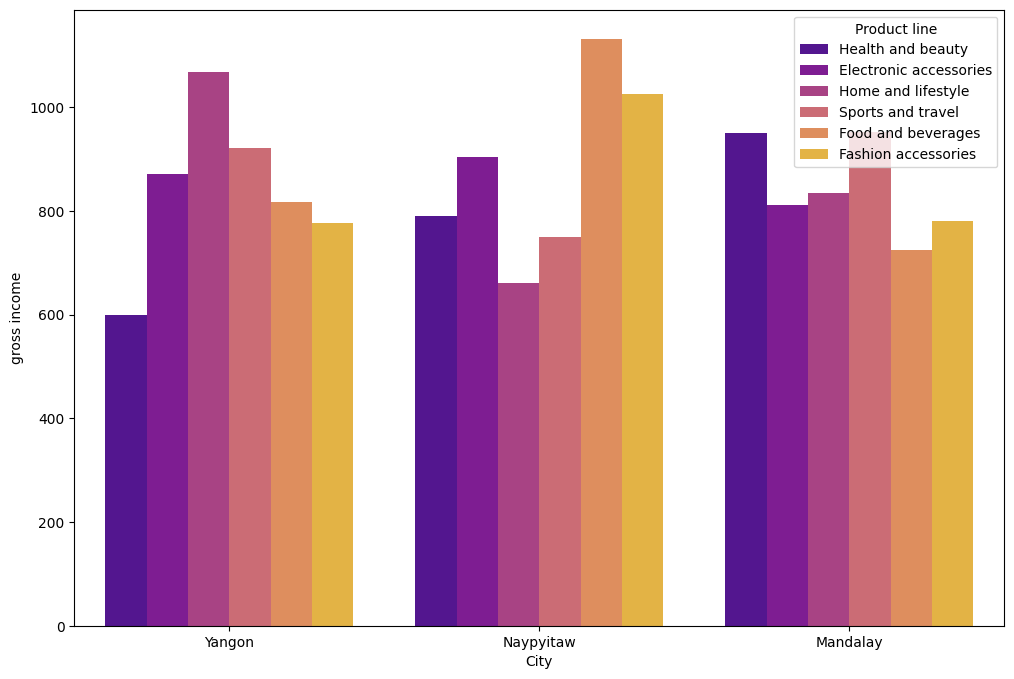

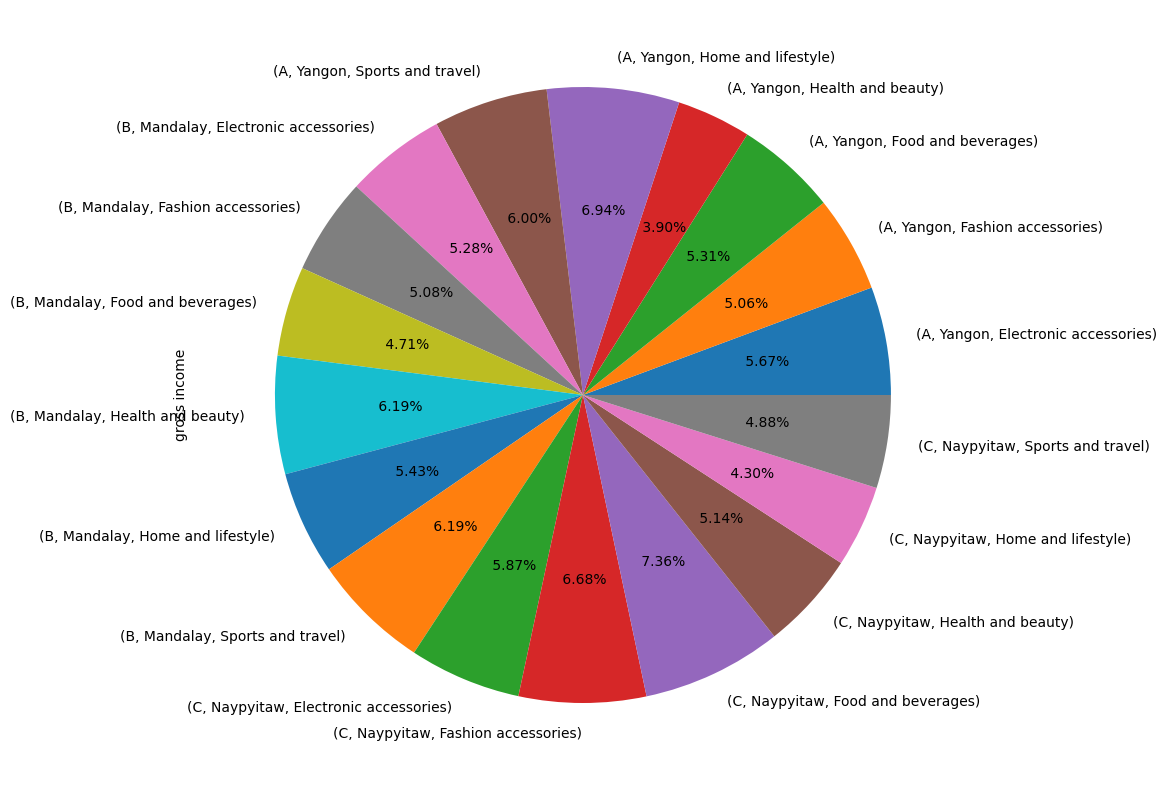

In [13]:
print(df.groupby(['Branch','City','Product line'])['gross income'].sum())

plt.figure(figsize=(12,8))
sns.barplot(x='City',y='gross income',hue='Product line',data=df,estimator=sum,ci=None,palette='plasma')

plt.figure(figsize=(10,10))
df.groupby(['Branch','City','Product line'])['gross income'].sum().plot.pie(autopct='% 1.2f%%')
plt.show()

Above graph and pie chart shows the gross income (in $) distribution of different product line according to city in which :
- In Yangon city highest gross income collected by 'Home and lifestyle' product line i.e. 1067.4855 and  lowest by 'Health   and beauty' product line i.e. 599.8930
- In Mandalay city highest gross income collected by 'Health and beauty' & 'Sports and travel'product line both have almost   same contribution i.e. approx. 951 and lowest by 'Food and beverages' product line i.e. 724.5185
- In Naypyitaw city highest gross income collected by 'Food and beverages' product line i.e. 1131.7550 and lowest by 'Home   and lifestyle' product line i.e. 661.6930

### 7. Find maximum , sum , minimum and average of monthly Total income

In [14]:
month=df['Date'].dt.month
df.groupby(month)["Total"].agg(["max","sum","min","mean"]).sort_values(by='mean',ascending=False)

,max,sum,min,mean
Date,,,,
1,1034.46,116291.868,12.6945,330.374625
2,1042.65,97219.374,10.6785,320.856020
3,1022.49,109455.507,16.2750,317.262339


The Dataset of Supermarket sale is of three months so the Total income divided into respective month and above table 
shows the maximum, minimum, Total and Average of the Total income w.r.t. months in which :
- maximum sale highest in February and lowest in March Month.
- Total sale highest in January and lowest in February Month.
- minimum sale in March Month.
- Average sale highest in January and lowest in March. 

### 8. Total Sale of Product.

<AxesSubplot: xlabel='Product line', ylabel='Total'>

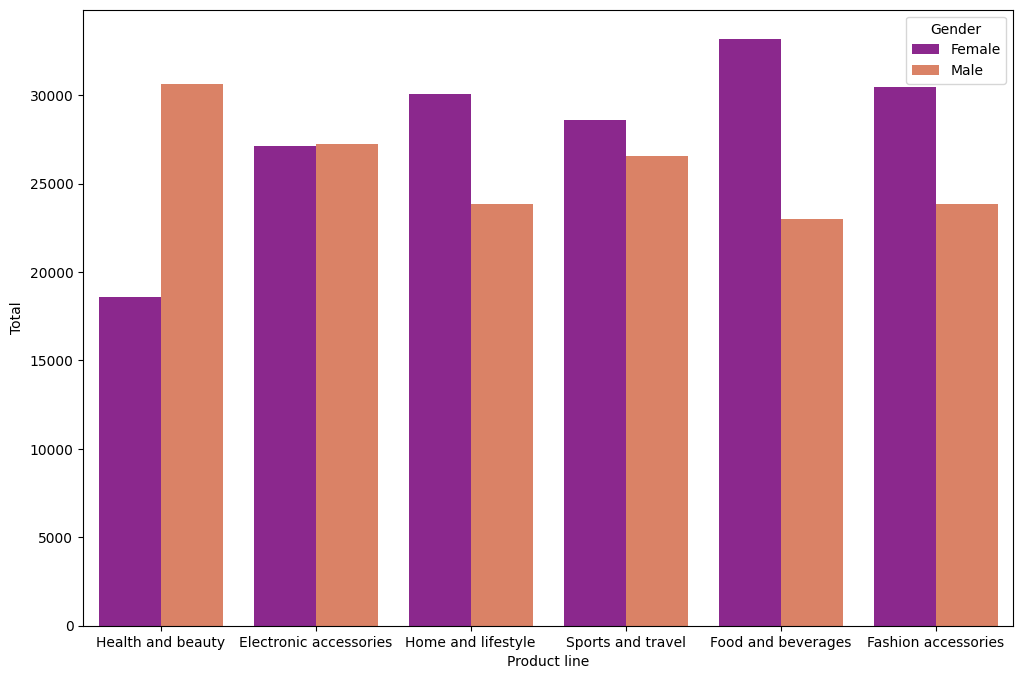

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x='Product line',y='Total',hue='Gender',data=df,estimator=sum,ci=None,palette='plasma')

Above graph shows Male customer purchase price maximum 'Health and Beauty' product and minimum 'Food and beverages' product.
Female customer purchase price maximum 'Food and beverages' product and minimum 'Health and Beauty' product.

### 9. Display Data distribution of Total payment

322.966749
253.848


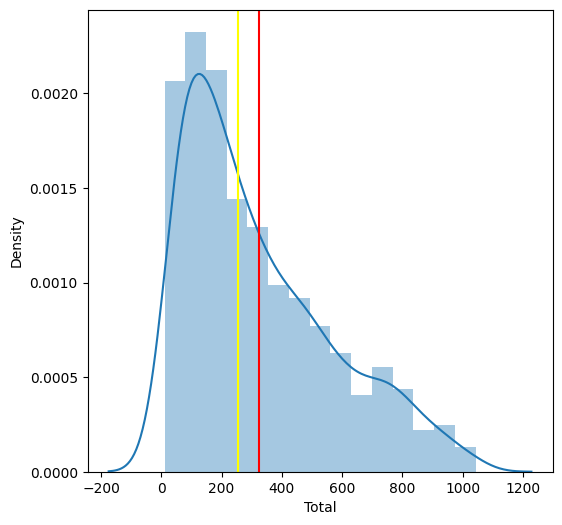

In [16]:
print(df['Total'].mean())
print(df['Total'].median())
Total_mean=df['Total'].mean()
Total_median=df['Total'].median()
plt.figure(figsize=(6,6))
sns.distplot(df['Total'])
plt.axvline(Total_mean,color='red')
plt.axvline(Total_median,color='yellow')

Data Distribution of Total Payment shows right skewness. Most of high values lie on left side and few high value lie on right side. Density of Total price maximum in between 0 to 250. Mean of Total price is 322.966749 and median is 253.848.

### 10. Display count of city wise payment mode

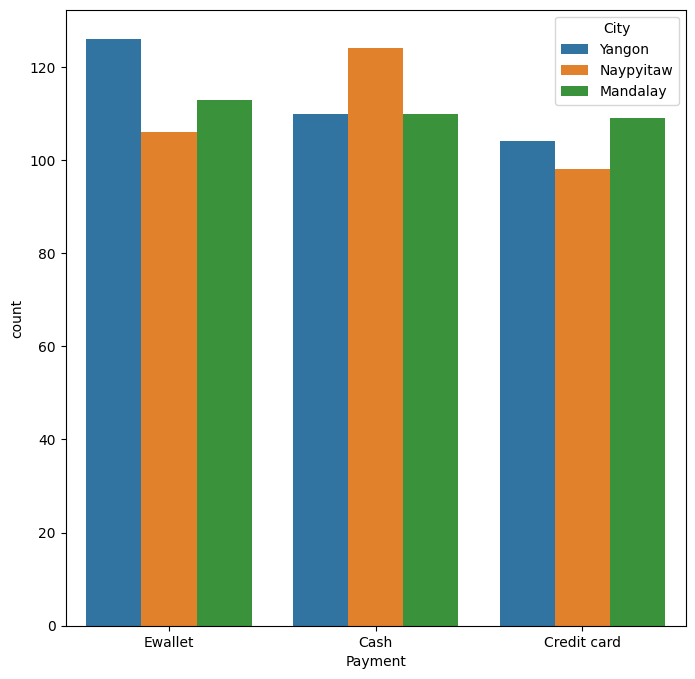

In [17]:
plt.figure(figsize=(8,8))
sns.countplot(data=df,x=df['Payment'],hue='City')
plt.show()

- maximum Ewallet payment done in 'Yangon' city and minimum in 'Naypyitaw' city.
- maximum Cash payment done in 'Naypyitaw' city and another city have equal in count.
- maximum Credit card payment done in 'Mandalay' city and minimum in 'Naypyitaw' city.

### 11. Box Plot of Total price according to Quantity

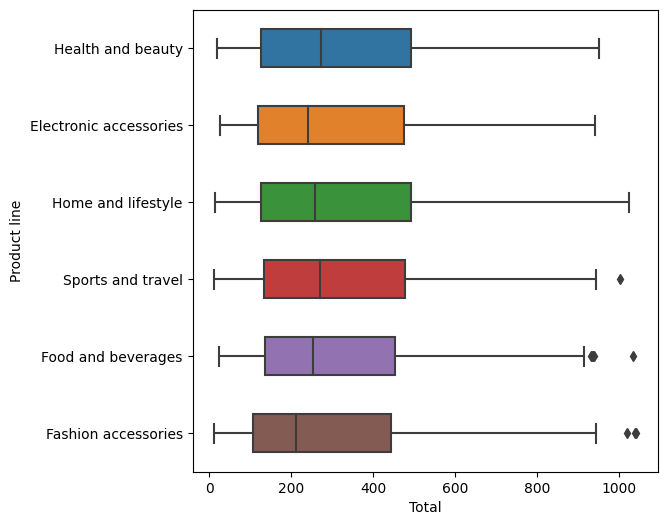

In [18]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,y='Product line',x='Total',width=0.5)
plt.show()

The above graph shows boxplot of product line according to Total price of product supermarket in which 'sports and travel', 'Food and beverages' and 'Fashion accessories' shows outliers

### 12. Find maximum profit earned by which product

In [19]:
df.groupby(['Product line'])['gross income'].sum()

Product line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross income, dtype: float64

Maximum profit earned by 'Food and beverages' is '$ 2673.5640'

### 13. Display the products rating details

In [20]:
df.groupby(['Product line'])["Rating"].agg(["max","sum","min","mean"]).sort_values(by='mean',ascending=True)

,max,sum,min,mean
Product line,,,,
Home and lifestyle,9.9,1094.0,4.1,6.837500
Sports and travel,10.0,1148.1,4.0,6.916265
Electronic accessories,10.0,1177.2,4.0,6.924706
Health and beauty,10.0,1064.5,4.0,7.003289
Fashion accessories,9.9,1251.2,4.0,7.029213
Food and beverages,9.9,1237.7,4.0,7.113218


Above table shows the maximum, minimum, Total and Average ratings of the products